<a href="https://colab.research.google.com/github/salman117-sudo/new_project/blob/main/end_to_end_project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/content/placement.csv')

In [3]:
# over view of the data
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
# to check the frame
df.shape

(100, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [6]:
# we will remove the first column
# first : show we have all rows and second 1: show we have that started from 1 and onward
df.iloc[:,1:]

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


In [ ]:
# to seee the data we use matplotlib


In [10]:
import matplotlib.pyplot as plt


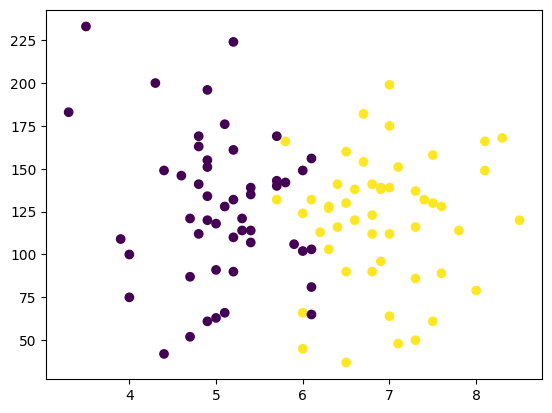

In [12]:
# yellow = placement yes other blavk mean no placement
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])


In [15]:
# then we seperate our inout and output column iq and cgpa are independent but placemet is dependent variablle
x = df.iloc[:,1:3]
y = df.iloc[:,-1]


In [16]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [17]:
y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [19]:
# trian the model
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1) # 10% data in test

In [20]:
x_train

,cgpa,iq
84,5.7,169.0
45,6.0,66.0
32,7.0,139.0
71,6.1,132.0
77,7.3,50.0
...,...,...
80,4.9,196.0
58,8.0,79.0
76,4.9,155.0
90,7.3,86.0


In [21]:
x_test

,cgpa,iq
89,4.9,151.0
35,6.8,90.0
26,7.0,199.0
25,5.0,91.0
8,6.1,156.0
97,6.7,182.0
38,6.5,160.0
86,5.1,128.0
41,5.4,114.0
16,5.2,224.0


In [22]:
y_train

,placement
84,0
45,1
32,1
71,1
77,1
...,...
80,0
58,1
76,0
90,1


In [30]:
# scale the value
from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler()

In [32]:
x_train = scaler.fit_transform(x_train)

In [33]:
x_train

array([[-0.26033868,  1.25835071],
       [-0.00380056, -1.4250887 ],
       [ 0.85132649,  0.47676642],
       [ 0.08171214,  0.29439675],
       [ 1.10786461, -1.84193365],
       [ 0.9368392 , -1.89403927],
       [-0.5168768 ,  0.47676642],
       [-0.17482598,  0.55492485],
       [-0.85892762, -0.07034259],
       [-1.02995303,  0.52887204],
       [-0.77341491, -1.4250887 ],
       [-0.00380056, -0.48718754],
       [-1.45751656,  2.06598782],
       [ 0.76581379,  0.47676642],
       [ 0.50927567,  0.45071361],
       [ 0.9368392 ,  0.78940014],
       [ 0.33825026,  0.52887204],
       [ 1.96299166,  1.2322979 ],
       [-0.94444033, -0.01823697],
       [-0.26033868,  0.58097766],
       [-0.94444033,  0.34650237],
       [-0.68790221,  1.04992824],
       [ 0.08171214, -0.46113473],
       [ 0.08171214, -1.03429655],
       [ 2.13401707, -0.01823697],
       [ 1.53542814, -0.17455383],
       [ 0.76581379, -0.6435044 ],
       [-0.68790221, -0.79982126],
       [-1.11546574,

In [36]:
x_test = scaler.transform(x_test)

In [37]:
# ALL values are scale
x_test

array([[-0.94444033,  0.78940014],
       [ 0.68030108, -0.79982126],
       [ 0.85132649,  2.03993501],
       [-0.85892762, -0.77376845],
       [ 0.08171214,  0.91966419],
       [ 0.59478837,  1.59703724],
       [ 0.42376296,  1.02387543],
       [-0.77341491,  0.19018551],
       [-0.5168768 , -0.17455383],
       [-0.68790221,  2.69125526]])

In [41]:
# trian model
from sklearn.linear_model import LogisticRegression

In [42]:
clf = LogisticRegression()

In [44]:
# actual model training
clf.fit(x_train,y_train)

LogisticRegression()

In [47]:
# model evaluation
y_pred = clf.predict(x_test)

In [46]:
y_test

,placement
89,0
35,1
26,1
25,0
8,0
97,1
38,1
86,0
41,0
16,0


In [48]:
from sklearn.metrics import accuracy_score

In [49]:
accuracy_score(y_test,y_pred)

0.9

In [50]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

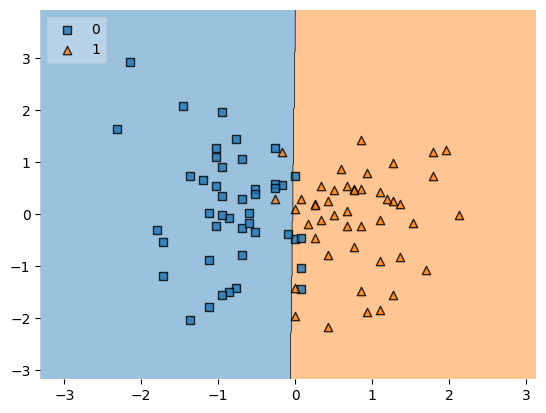

In [51]:
plot_decision_regions(x_train, y_train.values, clf=clf, legend=2)

In [52]:
import pickle

In [53]:
pickle.dump(clf,open('model.pk1','wb'))